Note: figure 4D was generated in a previous notebook (03).

In [1]:
suppressPackageStartupMessages({
    library(monocle)
    
    library(RColorBrewer)
    library(dplyr)
    library(ggplot2)
    library(ggtern)
    library(pheatmap)
    library(reshape2)
    library(scales)
})

Warning message:
“replacing previous import by ‘splines::splineDesign’ when loading ‘VGAM’”Warning message:
“replacing previous import by ‘grid::arrow’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘grid::unit’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘igraph::clusters’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘ggplot2::Position’ when loading ‘monocle’”

This analysis was made using Monocle version 2.3.5. The source code for Monocle 2.3.5 is available as a supplementary file to Cao et al. 2017 on the Science website. We are working on updating the analysis to the latest version of Monocle.

In [2]:
sessionInfo()

R version 3.2.1 (2015-06-18)
Platform: x86_64-unknown-linux-gnu (64-bit)
Running under: CentOS release 6.8 (Final)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] splines   stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] scales_0.4.1        reshape2_1.4.2      pheatmap_1.0.8     
 [4] ggtern_2.2.0        dplyr_0.7.1         RColorBrewer_1.1-2 
 [7] monocle_2.3.5       DDRTree_0.1.5       irlba_2.2.1        
[10] VGAM_1.0-3          ggplot2_2.2.1       Biobase_2.30.0     
[13] BiocGenerics_0.16.1 Matrix_1.2-7.1     

loaded via a namespace (and not attached):
 [1] Rcpp_0.

In [18]:
# at certain "checkpoints" in this notebook, we save our progress to this RData file
# run this cell to load your progress if you have already reached through one or more checkpoints in the notebook

# IF YOU RUN THIS CELL DO NOT RUN THE CELL BELOW

load("RData/L2.neuron.stuff.RData")

In [3]:
load("RData/L2.data.summaries.no-cruft.RData")

In [4]:
pData(cds.neurons)$plot.assignment = sapply(pData(cds.neurons)$cell.type, function(x) {
    if (is.na(x)) {
        return(NA)
    } else {
        return(switch(x,
            "Canal associated neurons" = "Canal associated",
            "Cholinergic neurons" = "Cholinergic",
            "Ciliated sensory neurons" = "Ciliated sensory",
            "Dopaminergic neurons" = "Dopaminergic",
            "flp-1(+) interneurons" = "Interneuron",
            "GABAergic neurons" = "GABAergic",
            "Other interneurons" = "Interneuron",
            "Oxygen sensory neurons" = "Oxygen sensory",
            "Pharyngeal neurons" = "Pharyngeal",
            "Touch receptor neurons" = "Touch receptor",
            "Unclassified neurons" = NA))
    }
})

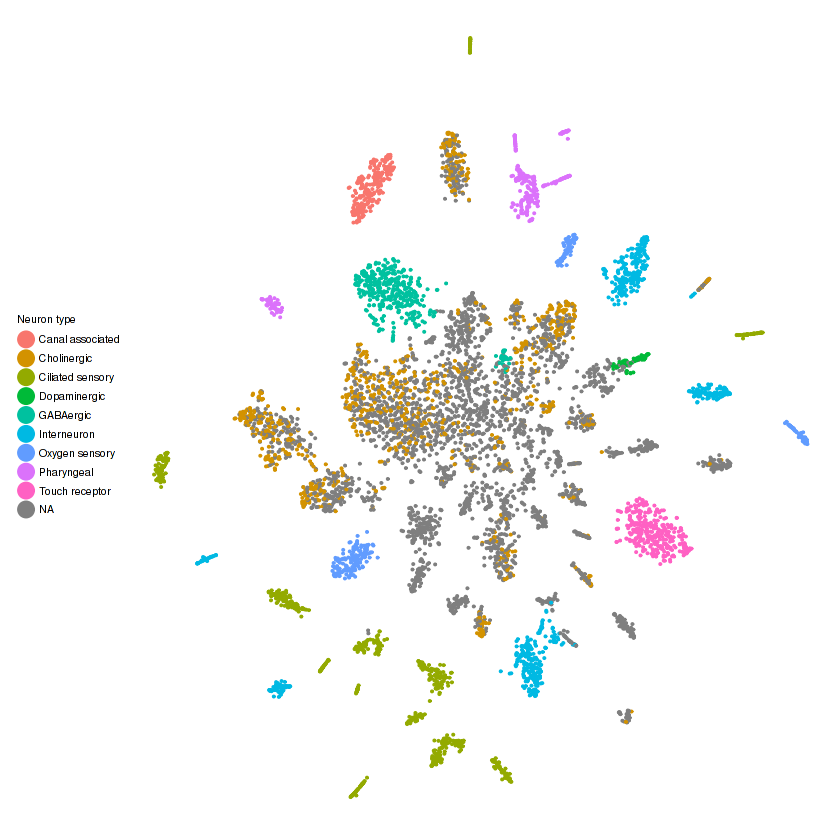

In [5]:
plot = ggplot(pData(cds.neurons), aes(x = tsne_1, y = tsne_2, color = plot.assignment)) +
    geom_point(size = 0.0666) +
    xlab("") + ylab("") +
    guides(color = guide_legend(
        title = "Neuron type",
        override.aes = list(size = 4))) +
    theme_void() +
    theme(axis.line = element_blank(),
          legend.title = element_text(size=6),
          legend.text = element_text(size=6),
          legend.margin = margin(0, -10, 0, 10),
          legend.key.width=unit(0.15, "in"),
          legend.key.height=unit(0.15, "in"),
          legend.position = "left")

show(plot)

ggsave("plots/Fig_4A.pdf",
    device = cairo_pdf, plot = plot, units="in", width = 3.0, height = 2.5)

In [6]:
unique(pData(cds.neurons)$fine.grained.neuron.type)

[1] NA                       "ASI/ASJ sensory"        "AFD thermosensory"     
 [4] "ASK sensory"            "RIA interneurons"       "SDQ/ALN/PLN O2-sensory"
 [7] "URX/AQR/PQR O2-sensory" "AWA olfactory"          "RIC interneurons"      
[10] "ASER gustatory"         "DVA interneuron"        "BAG O2-sensory"        
[13] "ASG sensory"            "AWB/AWC sensory"        "ASEL gustatory"

In [7]:
pData(cds.neurons)$fine.grained.neuron.type = ifelse(
    !is.na(pData(cds.neurons)$cell.type) & pData(cds.neurons)$cell.type == "Touch receptor neurons",
    "Touch receptor", pData(cds.neurons)$fine.grained.neuron.type)

In [8]:
head(pData(cds.neurons)$fine.grained.neuron.type)

[1] NA                  "ASI/ASJ sensory"   "AFD thermosensory"
[4] NA                  "Touch receptor"    "ASK sensory"

In [9]:
pData(cds.neurons)$plot.assignment = sapply(pData(cds.neurons)$fine.grained.neuron.type, function(x) {
    if (is.na(x)) {
        return(NA)
    } else {
        return(switch(x,
            "ASI/ASJ sensory" = "ASI/ASJ (4)",
            "AFD thermosensory" = "AFD (2)",
            "ASK sensory" = "ASK (2)",
            "RIA interneurons" = "RIA (2)",
            "SDQ/ALN/PLN O2-sensory" = "SDQ/ALN/PLN (6)",
            "URX/AQR/PQR O2-sensory" = "URX/AQR/PQR (4)",
            "AWA olfactory" = "AWA (2)",
            "RIC interneurons" = "RIC (2)",
            "ASER gustatory" = "ASER (1)",
            "DVA interneuron" = "DVA (1)",
            "BAG O2-sensory" = "BAG (2)",
            "ASG sensory" = "ASG (2)",
            "AWB/AWC sensory" = "AWB/AWC (4)",
            "ASEL gustatory" = "ASEL (1)",
            "Touch receptor" = "Touch receptor (6)"))
    }
})

In [10]:
head(pData(cds.neurons)$plot.assignment)

[1] NA                   "ASI/ASJ (4)"        "AFD (2)"           
[4] NA                   "Touch receptor (6)" "ASK (2)"

In [11]:
pData(cds.neurons)$plot.assignment = factor(pData(cds.neurons)$plot.assignment, levels = c(
    "ASEL (1)",
    "ASER (1)",
    "DVA (1)",
    "AFD (2)",
    "ASG (2)",
    "ASK (2)",
    "AWA (2)",
    "BAG (2)",
    "RIA (2)",
    "RIC (2)",
    "ASI/ASJ (4)",
    "AWB/AWC (4)",
    "URX/AQR/PQR (4)",
    "SDQ/ALN/PLN (6)",
    "Touch receptor (6)"))

In [12]:
head(pData(cds.neurons)$plot.assignment)

[1] <NA>               ASI/ASJ (4)        AFD (2)            <NA>              
[5] Touch receptor (6) ASK (2)           
15 Levels: ASEL (1) ASER (1) DVA (1) AFD (2) ASG (2) ASK (2) ... Touch receptor (6)

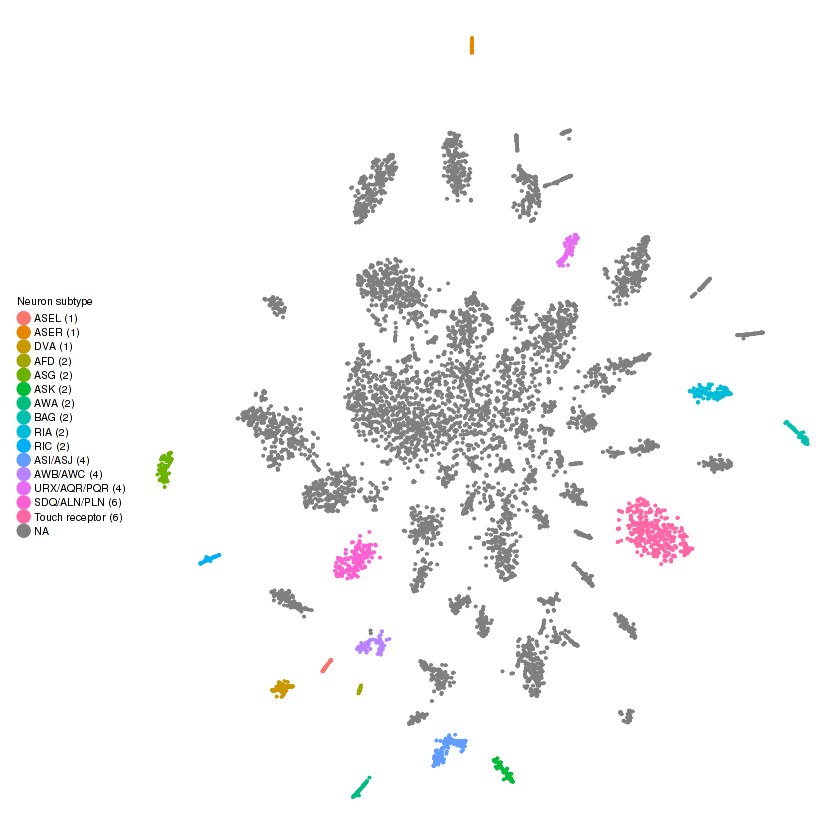

In [13]:
plot = ggplot(pData(cds.neurons), aes(x = tsne_1, y = tsne_2, color = plot.assignment)) +
    geom_point(size = 0.0666) +
    xlab("") + ylab("") +
    guides(color = guide_legend(
        title = "Neuron subtype",
        override.aes = list(size = 3))) +
    theme_void() +
    theme(axis.line = element_blank(),
          legend.title = element_text(size=6),
          legend.text = element_text(size=6),
          legend.margin = margin(0, -10, 0, 10),
          legend.key.width=unit(0.11, "in"),
          legend.key.height=unit(0.11, "in"),
          legend.position = "left")

show(plot)

ggsave("plots/Fig_4B.pdf",
    device = cairo_pdf, plot = plot, units="in", width = 3.0, height = 2.5)

In [14]:
neuron.enriched.norm.means = neuron.cluster.norm.means[
    (tissue.specific.genes %>% filter(max.tissue == "Neurons"))$gene,]

dim(neuron.enriched.norm.means)
neuron.enriched.norm.means[1:5, 1:5]

[1] 917  40

,AWA,ASG,Cholinergic (3),RIA,Cluster 5
flp-1,0.00000000,0.000000,0.009670164,0.000000,0.000000
egl-21,1.24369782,5.767252,3.524050766,1.773714,8.122533
mec-7,0.05918371,0.000000,0.060523409,0.000000,1.338126
egl-3,2.00118025,4.023184,2.584070836,1.447033,4.878059
T27C4.1,2.59075334,10.805568,3.399063205,1.319985,1.898429


In [15]:
mat = neuron.enriched.norm.means
mat = mat[apply(mat, 1, max) >= 0.05,]
mat = log2(mat+1)
mat = t(scale(t(mat)))
mat = ifelse(mat < -2.0, -2.0, mat)
mat = ifelse(mat > 2.0, 2.0, mat)

colnames(mat) = sub("Pharyngeal [(][0-9]*[)]", "Pharyngeal",
    sub("Cholinergic [(][0-9]*[)]", "Cholinergic", colnames(mat)))

dim(mat)

[1] 910  40

In [16]:
set.seed(42)
pdf("plots/Fig_4C.pdf", width = 3.0, height = 4.0, onefile = F)
pheatmap(t(mat), show_colnames = F, clustering_method = "ward.D2",
    cutree_rows = 12, fontsize = 6, treeheight_col = 16, treeheight_row = 16)
dev.off()

PNG 
  2

In [9]:
cds.ASE.LR = cds.neurons[, grepl("ASE", pData(cds.neurons)$cluster.name)]
cds.ASE.LR = detectGenes(cds.ASE.LR, 0.1)

cds.AWA.ASG = cds.neurons[, grepl("AWA|ASG", pData(cds.neurons)$cluster.name)]
cds.AWA.ASG = detectGenes(cds.AWA.ASG, 0.1)

dim(cds.ASE.LR)
dim(cds.AWA.ASG)

Features  Samples 
   20271       72

Features  Samples 
   20271      140

In [10]:
expressed.genes = rownames(cds.ASE.LR)[apply(exprs(cds.ASE.LR), 1, function(x) sum(x > 0)) >= 10]
length(expressed.genes)

ASE.LR.DE.genes = differentialGeneTest(
    cds.ASE.LR[expressed.genes,],
    fullModelFormulaStr = "~ cluster.name")

[1] 367

In [11]:
expressed.genes = rownames(cds.AWA.ASG)[apply(exprs(cds.AWA.ASG), 1, function(x) sum(x > 0)) >= 10]
length(expressed.genes)

AWA.ASG.DE.genes = differentialGeneTest(
    cds.AWA.ASG[expressed.genes,],
    fullModelFormulaStr = "~ cluster.name")

[1] 644

In [12]:
ASE.LR.DE.genes = inner_join(ASE.LR.DE.genes, data.frame(
    symbol = row.names(neuron.cluster.norm.means), 
    ASEL.tpm = (neuron.cluster.norm.means[, "ASEL"] / sum(neuron.cluster.norm.means[, "ASEL"])) * 1000000,
    ASER.tpm = (neuron.cluster.norm.means[, "ASER"] / sum(neuron.cluster.norm.means[, "ASER"])) * 1000000
), by = "symbol") %>% mutate(
    L.R.ratio = ASEL.tpm / (ASER.tpm + 1),
    R.L.ratio = ASER.tpm / (ASEL.tpm + 1),
    log2.fc = ifelse(L.R.ratio > 1, log2(L.R.ratio), -log2(R.L.ratio))) %>% select(
    gene_id, symbol, qval, ASEL.tpm, ASER.tpm, log2.fc)

In [13]:
AWA.ASG.DE.genes = inner_join(AWA.ASG.DE.genes, data.frame(
    symbol = row.names(neuron.cluster.norm.means), 
    AWA.tpm = (neuron.cluster.norm.means[, "AWA"] / sum(neuron.cluster.norm.means[, "AWA"])) * 1000000,
    ASG.tpm = (neuron.cluster.norm.means[, "ASG"] / sum(neuron.cluster.norm.means[, "ASG"])) * 1000000
), by = "symbol") %>% mutate(
    AWA.ASG.ratio = AWA.tpm / (ASG.tpm + 1),
    ASG.AWA.ratio = ASG.tpm / (AWA.tpm + 1),
    log2.fc = ifelse(AWA.ASG.ratio > 1, log2(AWA.ASG.ratio), -log2(ASG.AWA.ratio))) %>% select(
    gene_id, symbol, qval, AWA.tpm, ASG.tpm, log2.fc)

In [14]:
sum(ASE.LR.DE.genes$qval < 0.05 & abs(ASE.LR.DE.genes$log2.fc) >= log2(3))
ASE.LR.DE.genes %>% arrange(qval) %>% head(10)

[1] 44

gene_id,symbol,qval,ASEL.tpm,ASER.tpm,log2.fc
WBGene00001530,gcy-3,2.189709e-12,0.000,9593.506,-13.227842
WBGene00001547,gcy-22,4.982624e-12,0.000,8862.360,-13.113475
WBGene00004053,tank-1,6.183951e-10,1794.188,36169.778,-4.332578
WBGene00019592,K09F6.9,2.787341e-09,0.000,5925.954,-12.532832
WBGene00001533,gcy-6,3.431943e-09,6909.705,0.000,12.754408
WBGene00001542,gcy-17,3.431943e-09,6553.874,0.000,12.678132
WBGene00001540,gcy-14,1.909675e-08,6083.649,0.000,12.570721
WBGene00019593,K09F6.10,2.183209e-08,0.000,4441.100,-12.116701
WBGene00001545,gcy-20,4.284484e-08,5339.037,0.000,12.382364
WBGene00017157,tyra-2,1.518854e-07,0.000,3753.158,-11.873889


In [15]:
sum(AWA.ASG.DE.genes$qval < 0.05 & abs(AWA.ASG.DE.genes$log2.fc) >= log2(3))
AWA.ASG.DE.genes %>% arrange(qval) %>% head(10)

[1] 136

gene_id,symbol,qval,AWA.tpm,ASG.tpm,log2.fc
WBGene00001537,gcy-11,4.004768e-33,0.0000,34402.276084,-15.070216
WBGene00003856,odr-10,1.187841e-27,10706.6056,0.000000,13.386214
WBGene00045208,F13E9.15,8.483480e-21,8455.0102,46.326323,7.481020
WBGene00008051,lron-4,2.032856e-18,0.0000,8935.960134,-13.125407
WBGene00016896,nep-4,7.960617e-18,5544.8333,0.000000,12.436928
WBGene00016114,flp-27,4.338634e-16,248.7318,12631.928660,-5.660551
WBGene00020385,nhr-216,1.839090e-15,4165.6438,7.199942,8.988710
WBGene00018258,F41B4.2,7.699712e-15,0.0000,6366.533858,-12.636292
WBGene00010236,F58B4.3,2.797155e-14,0.0000,5466.241744,-12.416334
WBGene00009216,F28D1.6,8.837206e-13,0.0000,4770.754540,-12.220002


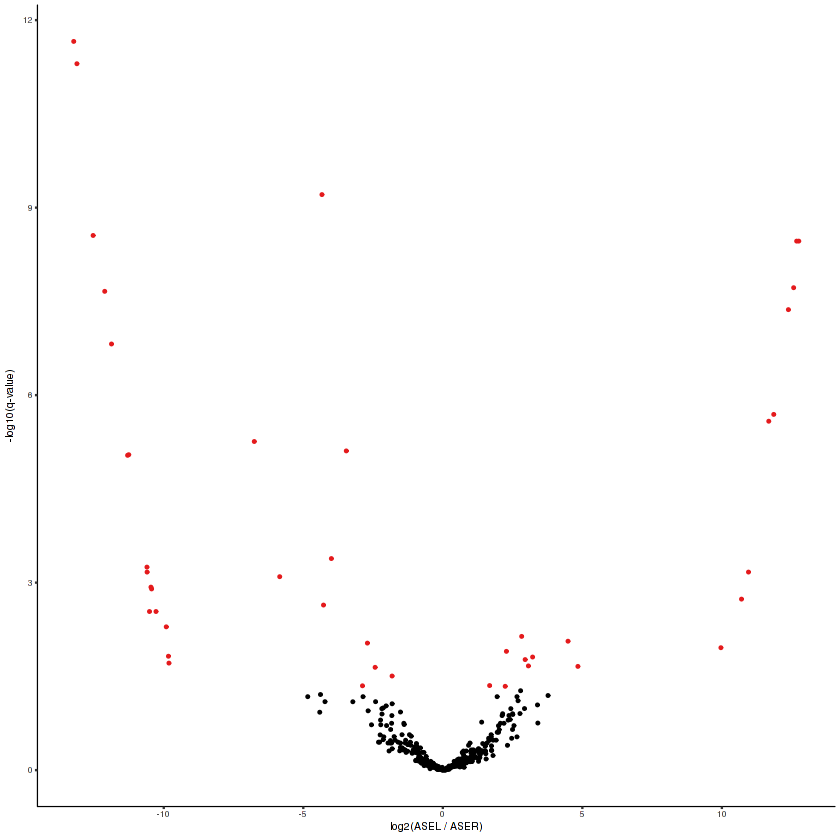

In [20]:
plot = ggplot(ASE.LR.DE.genes %>%
       mutate(sig.DE = qval < 0.05 & abs(log2.fc) >= log2(3)),
    aes(x = log2.fc, y = -log10(qval), color = sig.DE)) +
    geom_point(size = 0.333) +
    scale_color_manual(values = c("black", "#E41A1C")) +
    xlab("log2(ASEL / ASER)") +
    ylab("-log10(q-value)") +
    guides(color = F) +
    theme_bw(base_size = 6) +
    monocle:::monocle_theme_opts()

show(plot)

ggsave("plots/Fig_4F.pdf",
    device = cairo_pdf, plot = plot, units = "in", width = 1.2, height = 1.2)

In [8]:
ASE.LR.DE.genes %>% filter(symbol %in% c("gcy-6", "gcy-17"))

gene_id,symbol,qval,ASEL.tpm,ASER.tpm,log2.fc
WBGene00001533,gcy-6,3.431943e-09,6909.705,0,12.75441
WBGene00001542,gcy-17,3.431943e-09,6553.874,0,12.67813


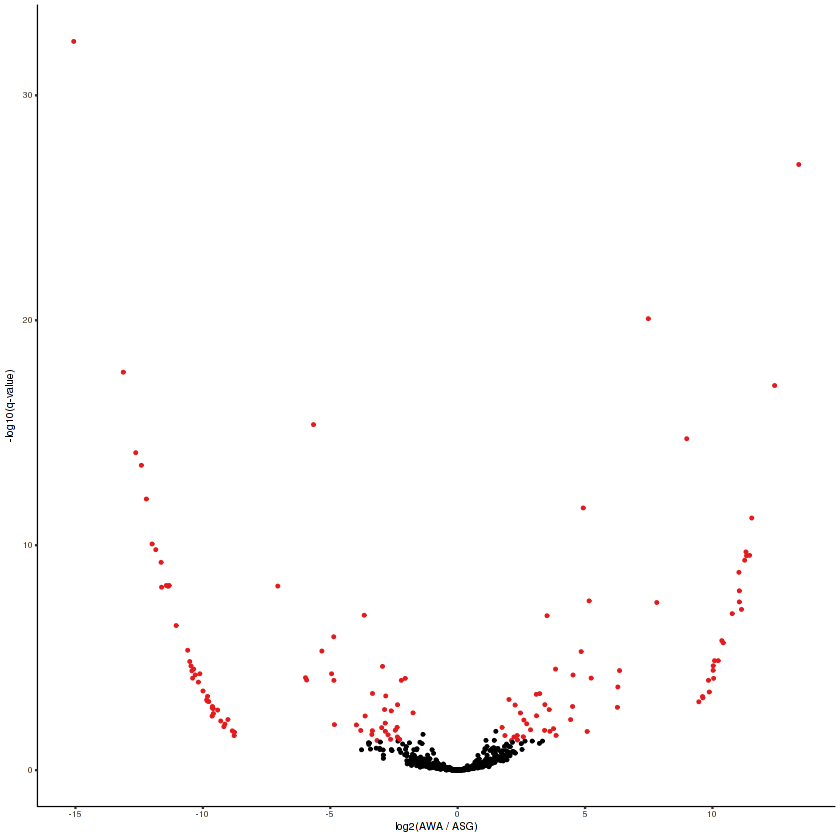

In [21]:
plot = ggplot(AWA.ASG.DE.genes %>%
       mutate(sig.DE = qval < 0.05 & abs(log2.fc) >= log2(3)),
    aes(x = log2.fc, y = -log10(qval), color = sig.DE)) +
    geom_point(size = 0.333) +
    scale_color_manual(values = c("black", "#E41A1C")) +
    xlab("log2(AWA / ASG)") +
    ylab("-log10(q-value)") +
    guides(color = F) +
    theme_bw(base_size = 6) +
    monocle:::monocle_theme_opts()

show(plot)

ggsave("plots/Fig_4G.pdf",
    device = cairo_pdf, plot = plot, units = "in", width = 1.2, height = 1.2)

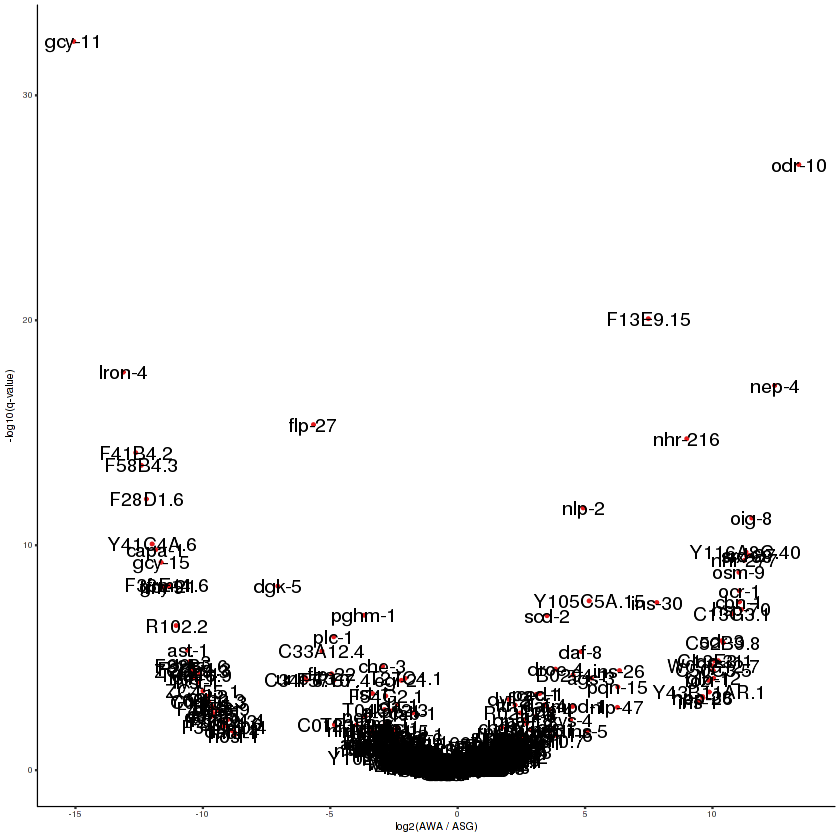

In [9]:
ggplot(AWA.ASG.DE.genes %>%
       mutate(sig.DE = qval < 0.05 & abs(log2.fc) >= log2(3)),
    aes(x = log2.fc, y = -log10(qval), color = sig.DE)) +
    geom_point(size = 0.333) +
    geom_text(aes(label = symbol), color = "black") +
    scale_color_manual(values = c("black", "#E41A1C")) +
    xlab("log2(AWA / ASG)") +
    ylab("-log10(q-value)") +
    guides(color = F) +
    theme_bw(base_size = 6) +
    monocle:::monocle_theme_opts()

In [21]:
write.table(ASE.LR.DE.genes[, 1:6] %>% arrange(qval), file = "tables/Table_S12.tsv",
    sep = "\t", row.names = F, col.names = T, quote = F)

write.table(AWA.ASG.DE.genes[, 1:6] %>% arrange(qval), file = "tables/Table_S13.tsv",
    sep = "\t", row.names = F, col.names = T, quote = F)

In [22]:
zork = data.frame(
    gene = c(
        "gcy-19", "nlp-5", "gcy-3", "F08B4.4", "C39D10.5", "EGAP5.1", "gcy-22", "F08G12.8",
        "gcy-4", "K07C5.9", "nlp-7", "gcy-5", "trp-2", "hen-1", "fozi-1",
        "gcy-7", "gcy-20", "gcy-6", "ins-32", "gcy-14", "ugt-56", "gcy-17", "lim-6",
        "flp-20", "flp-4"),
    sig.DE = c(
        "ASER", "ASER", "ASER", "ASER", "NA", "NA", "ASER", "NA",
        "ASER", "NA", "ASER", "ASER", "ASER", "ASER", "NA",
        "ASEL", "ASEL", "ASEL", "NA", "ASEL", "ASEL", "ASEL", "ASEL",
        "NA", "NA"),
    reported.bias = c(rep("ASER", 15), rep("ASEL", 5), "Equal", rep("ASEL", 4))) %>% inner_join(
        data.frame(
            gene = rownames(neuron.cluster.norm.means),
            ASEL.norm.expr = neuron.cluster.norm.means[, "ASEL"],
            ASER.norm.expr = neuron.cluster.norm.means[, "ASER"]), by = "gene")

head(zork)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”

gene,sig.DE,reported.bias,ASEL.norm.expr,ASER.norm.expr
gcy-19,ASER,ASER,0.4033862,2.17333133
nlp-5,ASER,ASER,0.0000000,0.85655700
gcy-3,ASER,ASER,0.0000000,5.83308061
F08B4.4,ASER,ASER,0.0000000,1.48596737
C39D10.5,NA,ASER,0.0000000,0.17398534
EGAP5.1,NA,ASER,0.0000000,0.06733376


In [23]:
zork

gene,sig.DE,reported.bias,ASEL.norm.expr,ASER.norm.expr
gcy-19,ASER,ASER,0.40338617,2.17333133
nlp-5,ASER,ASER,0.00000000,0.85655700
gcy-3,ASER,ASER,0.00000000,5.83308061
F08B4.4,ASER,ASER,0.00000000,1.48596737
C39D10.5,NA,ASER,0.00000000,0.17398534
EGAP5.1,NA,ASER,0.00000000,0.06733376
gcy-22,ASER,ASER,0.00000000,5.38852626
F08G12.8,NA,ASER,0.00000000,0.00000000
gcy-4,ASER,ASER,0.00000000,0.94303723
K07C5.9,NA,ASER,0.00000000,0.62595340


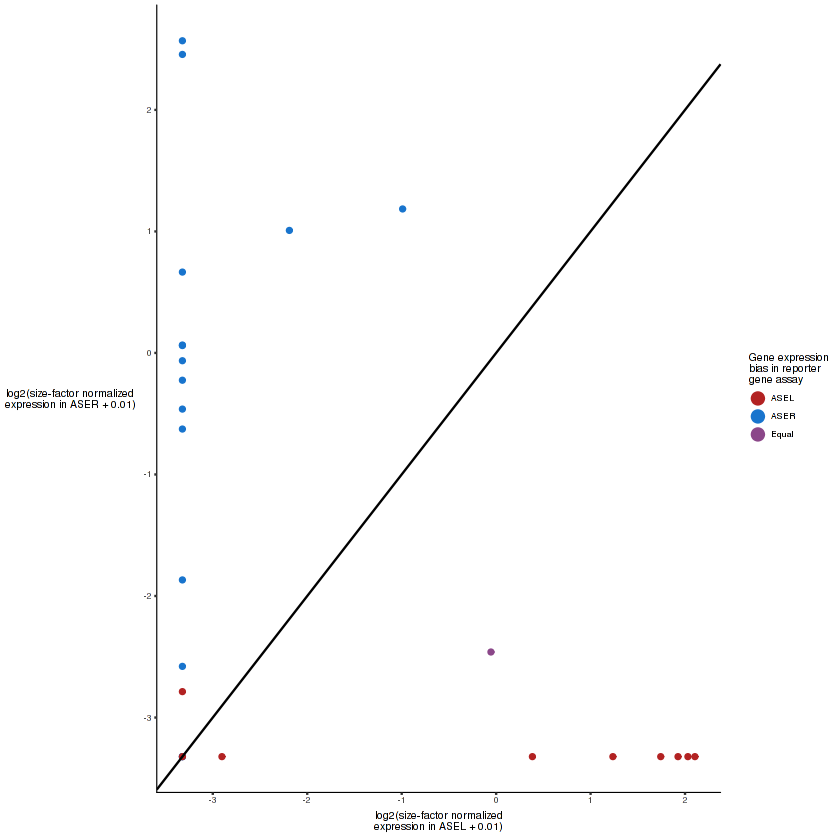

In [24]:
plot = ggplot(zork, aes(x = log2(ASEL.norm.expr + 0.1), y = log2(ASER.norm.expr + 0.1),
                        color = reported.bias)) +
    geom_point(size = 1.0) +
    geom_abline() +
    scale_x_continuous(breaks = seq(-10, 10, 1)) +
    scale_y_continuous(breaks = seq(-10, 10, 1)) +
    xlab("log2(size-factor normalized\nexpression in ASEL + 0.01)") +
    ylab("log2(size-factor normalized\nexpression in ASER + 0.01)") +
    guides(color = guide_legend(title = "Gene expression\nbias in reporter\ngene assay", override.aes = list(size = 3))) +
    scale_color_manual(values = c("firebrick", "dodgerblue3", "orchid4")) +
    theme_bw(base_size = 6) +
    monocle:::monocle_theme_opts() +
    theme(
        axis.title.x = element_text(margin = margin(5, 0, 0, 0)),
        axis.title.y = element_text(margin = margin(0, 5, 0, 0), angle = 0, vjust = 0.5),
        legend.key.width = unit(0.15, "in"),
        legend.key.height = unit(0.15, "in"))

show(plot)

ggsave("plots/Fig_S11.pdf", plot = plot,
    device = cairo_pdf, units = "in", width = 4.0, height = 2.5)

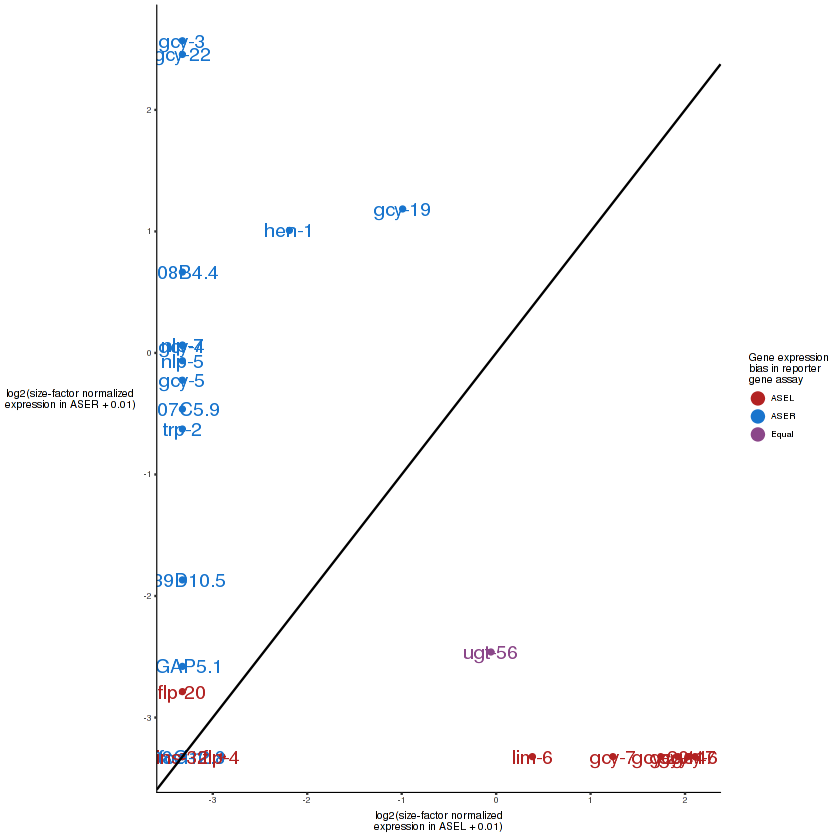

In [12]:
ggplot(zork, aes(x = log2(ASEL.norm.expr + 0.1), y = log2(ASER.norm.expr + 0.1),
                        color = reported.bias)) +
    geom_point(size = 1.0) +
    geom_text(aes(label = gene)) +
    geom_abline() +
    scale_x_continuous(breaks = seq(-10, 10, 1)) +
    scale_y_continuous(breaks = seq(-10, 10, 1)) +
    xlab("log2(size-factor normalized\nexpression in ASEL + 0.01)") +
    ylab("log2(size-factor normalized\nexpression in ASER + 0.01)") +
    guides(color = guide_legend(title = "Gene expression\nbias in reporter\ngene assay", override.aes = list(size = 3))) +
    scale_color_manual(values = c("firebrick", "dodgerblue3", "orchid4")) +
    theme_bw(base_size = 6) +
    monocle:::monocle_theme_opts() +
    theme(
        axis.title.x = element_text(margin = margin(5, 0, 0, 0)),
        axis.title.y = element_text(margin = margin(0, 5, 0, 0), angle = 0, vjust = 0.5),
        legend.key.width = unit(0.15, "in"),
        legend.key.height = unit(0.15, "in"))

In [25]:
zork = data.frame(
    neuron.type = c(
        "ASEL", "ASER", "DVA",
        "AFD", "ASG", "ASK", "AWA", "BAG", "RIA", "RIC", "CAN",
        "ASI/ASJ", "AWB/AWC", "URX/AQR/PQR", "SDQ/ALN/PLN", "Touch receptor",
        "Dopaminergic", "flp-1(+)", "Pharyngeal", "GABAergic"),
    n.observed = c(
        37, 35, 68,
        29, 86, 72, 54, 67, 108, 49, 239,
        117, 84, 78, 160, 334,
        70, 224, 314, 400),
    n.anatomical = c(
        1, 1, 1,
        2, 2, 2, 2, 2, 2, 2, 2,
        4, 4, 4, 6, 6,
        8, 14, 20, 26))

In [26]:
zork %>% mutate(ratio = n.observed / n.anatomical) %>% arrange(-ratio)

neuron.type,n.observed,n.anatomical,ratio
CAN,239,2,119.50000
DVA,68,1,68.00000
Touch receptor,334,6,55.66667
RIA,108,2,54.00000
ASG,86,2,43.00000
ASEL,37,1,37.00000
ASK,72,2,36.00000
ASER,35,1,35.00000
BAG,67,2,33.50000
ASI/ASJ,117,4,29.25000


In [27]:
summary(lm(n.observed ~ n.anatomical, data = zork))


Call:
lm(formula = n.observed ~ n.anatomical, data = zork)

Residuals:
    Min      1Q  Median      3Q     Max 
-93.271 -33.440 -15.271   2.609 196.869 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    58.714     19.810   2.964  0.00831 ** 
n.anatomical   13.070      2.294   5.697 2.11e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.86 on 18 degrees of freedom
Multiple R-squared:  0.6432,	Adjusted R-squared:  0.6234 
F-statistic: 32.45 on 1 and 18 DF,  p-value: 2.111e-05


In [28]:
plot = ggplot(zork, aes(x = n.anatomical, y = n.observed)) +
    geom_point() +
    geom_smooth(method = "lm", se = F, color = "firebrick") +
    scale_x_continuous(breaks = c(1, 2, 4, 6, 8, 14, 20, 26)) +
    xlab("# of neurons in an individual L2 hermaphrodite") +
    ylab("# of neurons recovered in sci-RNA-seq") +
    theme_bw(base_size = 6) +
    monocle:::monocle_theme_opts() +
    theme(
        axis.title.x = element_text(margin = margin(5, 0, 0, 0)),
        axis.title.y = element_text(margin = margin(0, 5, 0, 0)))

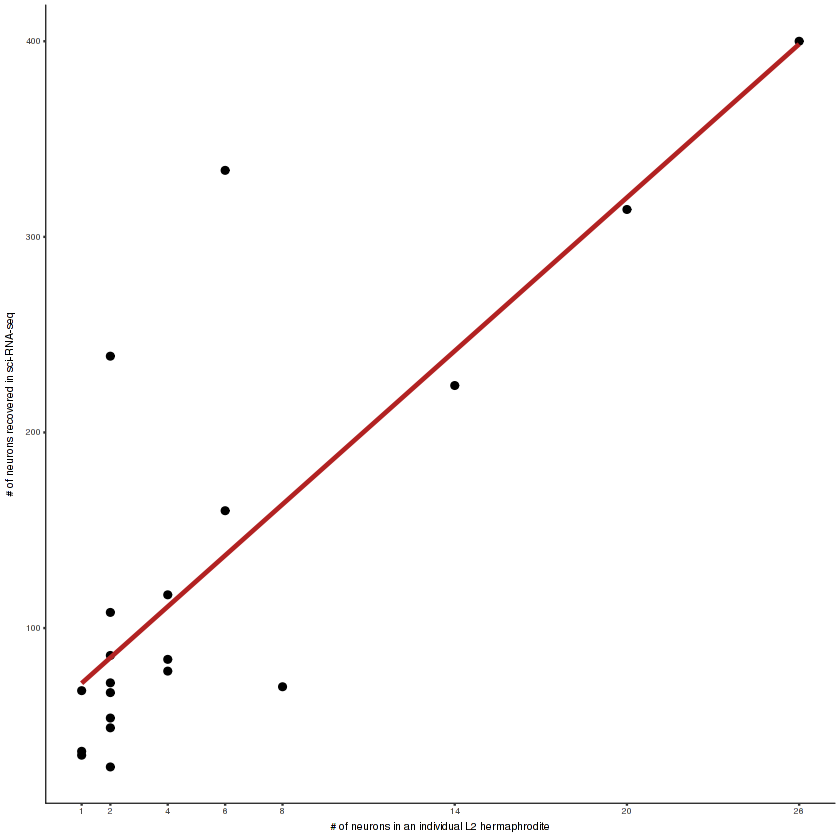

In [29]:
show(plot)

In [30]:
ggsave("plots/Fig_S24.pdf", plot = plot, units = "in", width = 2.5, height = 2.5)

In [16]:
save.image("RData/L2.neuron.stuff.RData")